In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [2]:
mnist_data = fetch_openml('mnist_784', version=1, cache=True)
X = mnist_data.data
y = mnist_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Users\Pranav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.

  warn(


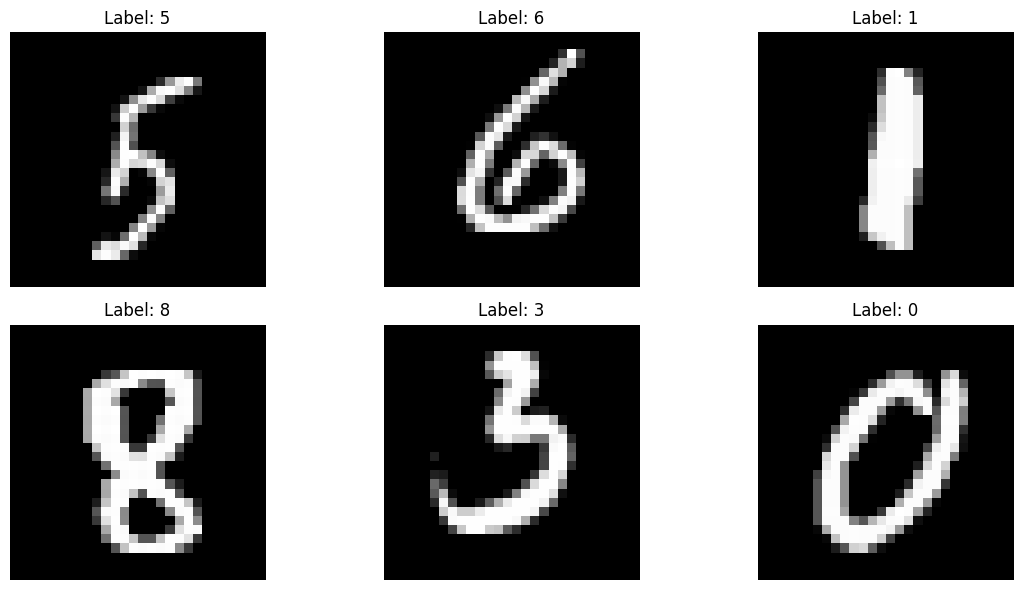

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_reshaped = X.values.reshape(-1, 28, 28)

random_indices = np.random.choice(len(X), size=6, replace=False)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_reshaped[idx], cmap='gray')
    plt.title(f"Label: {y[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

# Logistic Regression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)




c:\Users\Pranav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:, 1]  



[1.43287667e-19 1.91562645e-16 3.70169927e-08 ... 3.66433451e-03

 7.71204421e-19 9.99341429e-01]


In [ ]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')


In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')



In [ ]:
print("Logistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Logistic Regression Metrics:

Accuracy: 0.9162857142857143

Precision: 0.9160463863439156

Recall: 0.9162857142857143

F1 Score: 0.9160982293758989



Random Forest Metrics:

Accuracy: 0.9668571428571429

Precision: 0.9668690829131011

Recall: 0.9668571428571429

F1 Score: 0.9668435588838092


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

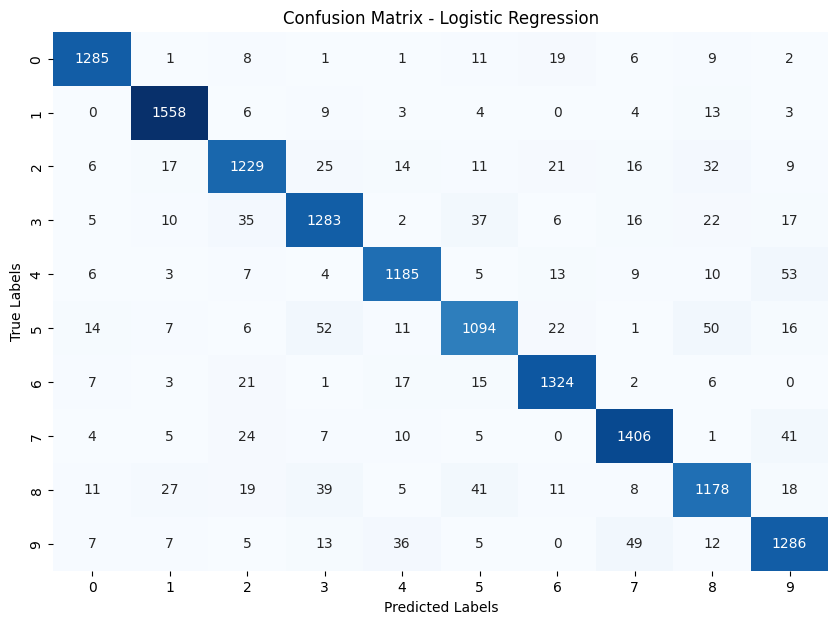

In [ ]:
lr_cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')



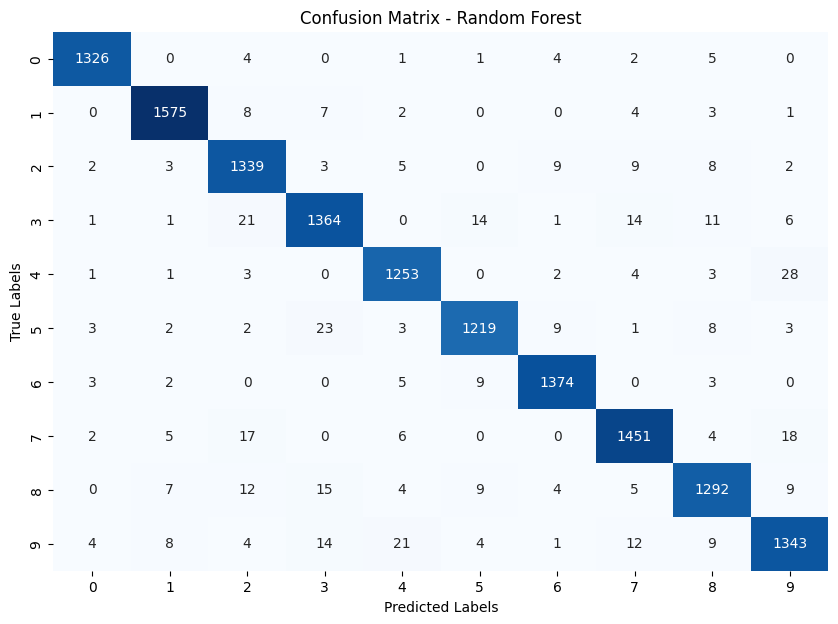

In [ ]:
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')

plt.show()

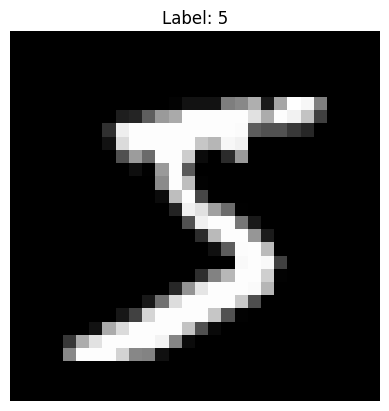

In [ ]:
import matplotlib.pyplot as plt

index = 0  
image = X.iloc[index].values.reshape(28, 28)
label = y.iloc[index]

plt.imshow(image, cmap='gray')
plt.title("Label: {}".format(label))
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import PIL.Image as Image

input_image = Image.fromarray(image)
input_image = input_image.convert('L')  
input_image = input_image.resize((28, 28)) 
input_data = np.array(input_image).reshape(1, -1)

lr_prediction = lr_model.predict(input_data)

rf_prediction = rf_model.predict(input_data)

print("Logistic Regression Prediction:", lr_prediction[0])
print("Random Forest Prediction:", rf_prediction[0])


Logistic Regression Prediction: 5

Random Forest Prediction: 5


c:\Users\Pranav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names

  warnings.warn(

c:\Users\Pranav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names

  warnings.warn(


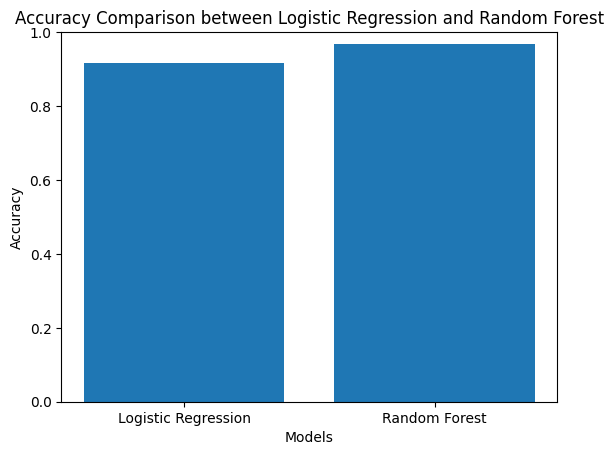

In [ ]:
import matplotlib.pyplot as plt

labels = ['Logistic Regression', 'Random Forest']
accuracy_scores = [lr_accuracy, rf_accuracy]

plt.bar(labels, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Logistic Regression and Random Forest')
plt.ylim(0, 1)
plt.show()
